In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
data_2015 = pd.read_csv("p4_2015.csv")
data_2016 = pd.read_csv("p4_2016.csv")

##Analyse descriptive

In [ ]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [ ]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [ ]:
#nb entrée
print('2015 :',len(data_2015))
print('2016 :',len(data_2016))

2015 : 3340
2016 : 3376


In [ ]:
#nombre d'indicateur
print('2015 :',len(data_2015.columns))
print('2016 :',len(data_2016.columns))

2015 : 47
2016 : 46


In [ ]:
t_2015=data_2015.T
ind_2015=t_2015.index
ind_2015=ind_2015.sort_values()
print('ind 2015:',ind_2015)

t_2016=data_2016.T
ind_2016=t_2016.index
ind_2016=ind_2016.sort_values()
print('ind 2016:',ind_2016)

ind 2015: Index(['2010 Census Tracts', 'BuildingType', 'City Council Districts',
       'Comment', 'ComplianceStatus', 'CouncilDistrictCode', 'DataYear',
       'DefaultData', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ListOfAllPropertyUseTypes', 'Location',
       'NaturalGas(kBtu)', 'NaturalGas(therms)', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID',
       'OtherFuelUse(kBtu)', 'Outlier', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal',
       'PropertyName', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'Sou

In [ ]:
print('les élements suivants n\'apparaissent plus en 2016 :')
for i in ind_2015:
  if i not in ind_2016:
    print (i)
print('\n')
print('les élements suivants ont été ajouté depuis 2015 :')
for i in ind_2016:
  if i not in ind_2015:
    print (i)

les élements suivants n'apparaissent plus en 2016 :
Zip Codes
GHGEmissions(MetricTonsCO2e)
2010 Census Tracts
GHGEmissionsIntensity(kgCO2e/ft2)
Location
OtherFuelUse(kBtu)
Comment
SPD Beats
City Council Districts
Seattle Police Department Micro Community Policing Plan Areas


les élements suivants ont été ajouté depuis 2015 :
Address
Comments
City
TotalGHGEmissions
State
Longitude
Latitude
GHGEmissionsIntensity
ZipCode


analyse 'colonne'

In [ ]:
data_2015['Comment'].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

In [ ]:
data_2016['Comments'].unique()

array([nan])

In [ ]:
data_2015=data_2015.drop('Comment',axis=1)
data_2016=data_2016.drop('Comments',axis=1)

analyse colonne 'Location'

In [ ]:
data_2015['Location'].values

array(['{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61310583\', \'longitude\': \'-122.33335756\', \'human_address\': \'{"address": "724 PINE ST", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       '{\'latitude\': \'47.61334897\', \'longitude\': \'-122.33769944\', \'human_address\': \'{"address": "1900 5TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}',
       ...,
       '{\'latitude\': \'47.61649845\', \'longitude\': \'-122.33770787\', \'human_address\': \'{"address": "2030 8TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98121"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"address": "3801 NE 77TH ST", "city": "SEATTLE", "state": "WA", "zip": "98115"}\'}',
       '{\'latitude\': \'47.68396954\', \'longitude\': \'-122.2874088\', \'human_address\': \'{"

In [ ]:
# Extraction des datas de localisation depuis la colonnes 'Location'

In [ ]:
def location_extract(set_frame):
  frame=set_frame.copy()
  import ast

  info_location = pd.DataFrame(columns=['Latitude','Longitude','Address','City','State','ZipCode'])
  
  for n in range(len(frame)):

    loc_info=ast.literal_eval(frame.loc[n,'Location'])
    loc_info=pd.json_normalize(loc_info)
    add_info=ast.literal_eval(loc_info.loc[0,'human_address'])
    add_info=pd.json_normalize(add_info)

    info_location.loc[n,'Latitude']=loc_info.loc[0,'latitude']
    info_location.loc[n,'Longitude']=loc_info.loc[0,'longitude']
    info_location.loc[n,'Address']=add_info.loc[0,'address']
    info_location.loc[n,'City']=add_info.loc[0,'city']
    info_location.loc[n,'State']=add_info.loc[0,'state']
    info_location.loc[n,'ZipCode']=add_info.loc[0,'zip']

  frame_merge=pd.concat([frame,info_location],axis=1)
  frame_merge=frame_merge.drop(['Location','Zip Codes'],axis=1)

  return frame_merge

In [ ]:
data_2015_location=location_extract(data_2015)

analyse colonnes GHGE

In [ ]:
data_2015_location[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000
mean,110.094102,0.985339
std,409.450179,1.637172
min,0.000000,0.000000
25%,9.265000,0.080000
50%,32.740000,0.460000
75%,88.642500,1.180000
max,11824.890000,31.380000


In [ ]:
data_2016[['TotalGHGEmissions','GHGEmissionsIntensity']].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,3367.000000,3367.000000
mean,119.723971,1.175916
std,538.832227,1.821452
min,-0.800000,-0.020000
25%,9.495000,0.210000
50%,33.920000,0.610000
75%,93.940000,1.370000
max,16870.980000,34.090000


In [ ]:
# En regardant les ordres de grandeurs on peut renommer les colonnes

In [ ]:
data_2015_location=data_2015_location.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions","GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"})

Fusion des deux data set

In [ ]:
# vérification des colonnes

In [ ]:
data_2015_location=data_2015_location.drop(['2010 Census Tracts', 'OtherFuelUse(kBtu)', 'SPD Beats', 'City Council Districts', 'Seattle Police Department Micro Community Policing Plan Areas'],axis=1)

In [ ]:
print('les élements suivants n\'apparaissent plus en 2016 : \n', set(data_2015_location.columns) - set(data_2016.columns))
print('-'*35)
print('les élements suivants ont été ajouté depuis 2015  : \n', set(data_2016.columns) - set(data_2015_location.columns))

les élements suivants n'apparaissent plus en 2016 : 
 set()
-----------------------------------
les élements suivants ont été ajouté depuis 2015  : 
 set()


In [ ]:
print('2015 :', data_2015_location.shape)
print('2016 :', data_2016.shape)

2015 : (3340, 45)
2016 : (3376, 45)


In [ ]:
data=pd.concat([data_2015_location,data_2016], axis=0, sort=False)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


##Nettoyage

In [ ]:
str_colon=['BuildingType','PrimaryPropertyType','PropertyName','Neighborhood','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','ComplianceStatus','Outlier']
for col in str_colon:
  print(col)
  print(data[col].unique())
  print('-'*40)

BuildingType
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']
----------------------------------------
PrimaryPropertyType
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility\n' 'Distribution Center' 'Large Office'
 'Retail Store' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supermarket/Grocery Store' 'Laboratory'
 'Self-Storage Facility' 'Refrigerated Warehouse' 'High-Rise Multifamily'
 'Restaurant\n' 'Restaurant' 'University' 'Warehouse' 'Residence Hall'
 'Supermarket / Grocery Store' 'Office']
----------------------------------------
PropertyName
['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' ...
 'Queen Anne Pool' '

### Corrections str

In [ ]:
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)

In [ ]:
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].str.replace('\n','')

In [ ]:
data['City'].replace('SEATTLE', 'Seattle', inplace=True)

### Suppression des indicateurs non pertinents

In [ ]:
indi_to_drop = ['City','State', 'PropertyName', 'TaxParcelIdentificationNumber',
                'ListOfAllPropertyUseTypes', 'ComplianceStatus', 'DefaultData','Outlier', 'Address', 'ZipCode']
data=data.drop(indi_to_drop,axis=1)         
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,47.61219025,-122.33799744
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,47.61310583,-122.33335756
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,47.61334897,-122.33769944
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,47.61421585,-122.33660889
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,47.6137544,-122.3409238


###Valeurs négatives

In [ ]:
data.min()

OSEBuildingID                                       1
DataYear                                         2015
BuildingType                                   Campus
PrimaryPropertyType                College/University
CouncilDistrictCode                                 1
Neighborhood                                  BALLARD
YearBuilt                                        1900
NumberofBuildings                                   0
NumberofFloors                                      0
PropertyGFATotal                                11285
PropertyGFAParking                                 -3
PropertyGFABuilding(s)                         -50550
LargestPropertyUseTypeGFA                        5656
SecondLargestPropertyUseTypeGFA                     0
ThirdLargestPropertyUseTypeGFA                      0
ENERGYSTARScore                                     1
SiteEUI(kBtu/sf)                                    0
SiteEUIWN(kBtu/sf)                                  0
SourceEUI(kBtu/sf)          

In [ ]:
#renvoi un Nan si valeur négative

In [ ]:
col_nega=['PropertyGFAParking','PropertyGFABuilding(s)', 'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kWh)',
          'Electricity(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity']
for col in col_nega:
  data[col]=[val if val>=0 else np.NaN for val in data[col]]

### Valeurs nulles

In [ ]:
# si NumberofBuildings est nul la valeurs est fixé Nan

In [ ]:
data['NumberofBuildings']=[val if val==0 else np.NaN for val in data['NumberofBuildings']]

### Valeurs doublons

In [ ]:
# recherche si ID apparait plus d'une fois dans les data de 2015 et 2016

In [ ]:
len(data_2015_location)-data_2015_location['OSEBuildingID'].nunique()

0

In [ ]:
len(data_2016)-data_2016['OSEBuildingID'].nunique()

0

In [ ]:
### Pas de valeurs doublons

### Featuring

#### Taux de NaN

In [ ]:
#NaN par indicateur
def tau_nan(setframe):
  frame=setframe.copy()
  #par indicateur  
  taux_Nan_ind = [] 
  for i in range(len(frame.columns)): 
      taux_Nan_ind.append(frame[frame.columns[i]].isnull().sum()/len(frame)*100)
  data_NaN_indi=pd.DataFrame({'Indicateur': frame.columns, 'Taux NaN' : taux_Nan_ind})
  print('taux de NaN par indicateur:')
  data_NaN_indi['Taux NaN'].hist()
  plt.show()
  #par entrée
  taux_Nan_ent = [] 
  for i in range(len(frame)):
    taux_Nan_ent.append(frame.iloc[i].isnull().sum()/(len(frame.columns))*100)

  data_NaN_ent=pd.DataFrame({'Entrée': frame.index, 'Taux NaN' : taux_Nan_ent})
  print('taux de NaN par entrée:')
  data_NaN_ent['Taux NaN'].hist()
  plt.show()
  return data_NaN_indi,data_NaN_ent

taux de NaN par indicateur:


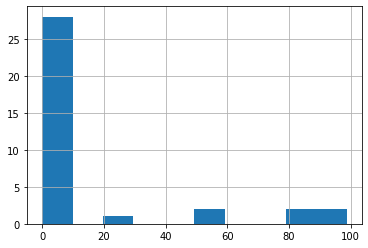

taux de NaN par entrée:


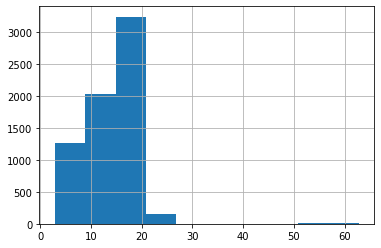

In [ ]:
Nan_ind , Nan_ent = tau_nan(data)

#### Selection des indicateur à modéliser

In [ ]:
Nan_ind

,Indicateur,Taux NaN
0,OSEBuildingID,0.000000
1,DataYear,0.000000
2,BuildingType,0.000000
3,PrimaryPropertyType,0.000000
4,CouncilDistrictCode,0.000000
5,Neighborhood,0.000000
6,YearBuilt,0.000000
7,NumberofBuildings,98.630137
8,NumberofFloors,0.119119
9,PropertyGFATotal,0.000000


In [ ]:
### Indicateur à supprimer si taux de Nan trop élevé (on garde ThirdLargestPropertyUseTypeGFA car dépend du nb de building )

In [ ]:
data=data.drop(['NumberofBuildings','YearsENERGYSTARCertified'],axis=1)

In [ ]:
### indicateur à modéliser : TotalGHGEmissions et SiteEnergyUseWN(kBtu)

In [ ]:
data_ind_final= data.drop(['SiteEUI(kBtu/sf)',
                        'SiteEUIWN(kBtu/sf)',
                        'SourceEUI(kBtu/sf)',
                        'SourceEUIWN(kBtu/sf)',
                        'SiteEnergyUse(kBtu)',
                        'SteamUse(kBtu)',
                        'Electricity(kWh)',
                        'Electricity(kBtu)',
                        'NaturalGas(therms)',
                        'NaturalGas(kBtu)',
                        'GHGEmissionsIntensity']
                        ,axis=1)

### stat


In [ ]:
#fonction pour calculer des stats, tracer la distribution et le boxplot pour chaque indicateur
def analyse_uni (frame,liste_catégorie):
    
    for cat in liste_catégorie:
        
        print('pour la catégorie :', cat)
        print("-"*20)
        print("moy:\n",frame[cat].mean())#moyenne
        print("med:\n",frame[cat].median())#mediane
        print("mod:\n",frame[cat].mode())#modale
        print("var:\n",frame[cat].var(ddof=0))#variance
        print("ect:\n",frame[cat].std(ddof=0))#ecart type
        print("skw:\n",frame[cat].skew())#asymétrie
        print("kur:\n",frame[cat].kurtosis())#aplatissement
        print("-"*20)
        
        frame[cat].hist(bins=25)
        plt.show()
        
        df=pd.DataFrame(frame[cat].copy())
        
        df.boxplot(column=cat, vert=False, showfliers=True)
        plt.show()
        

pour la catégorie : NumberofFloors
--------------------
moy:
 4.695736434108527
med:
 4.0
mod:
 0    3.0
dtype: float64
var:
 29.984495835124427
ect:
 5.47581006200219
skw:
 5.973290934569678
kur:
 56.81135406832773
--------------------


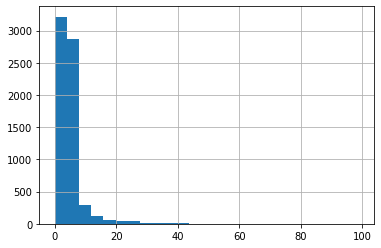

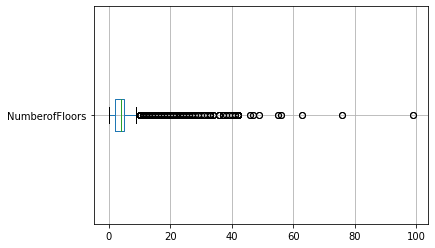

pour la catégorie : PropertyGFAParking
--------------------
moy:
 9522.434465296396
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 1147188696.831837
ect:
 33870.17414823604
skw:
 6.348097887369019
kur:
 54.52336680147904
--------------------


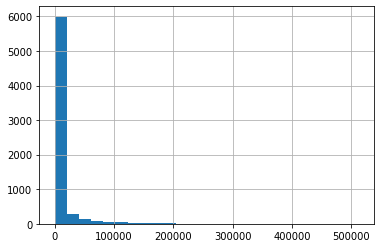

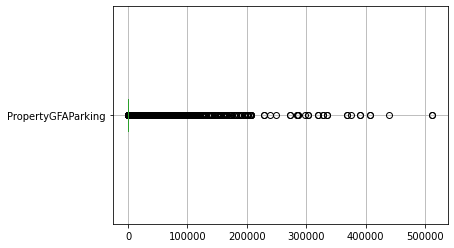

pour la catégorie : PropertyGFABuilding(s)
--------------------
moy:
 83333.29222520108
med:
 42188.0
mod:
 0    21600.0
1    25920.0
2    36000.0
dtype: float64
var:
 30048609403.429626
ect:
 173345.3472217516
skw:
 25.349417467255073
kur:
 1219.7661670835084
--------------------


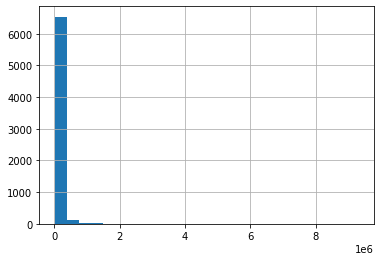

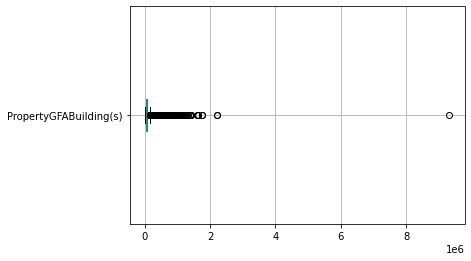

pour la catégorie : LargestPropertyUseTypeGFA
--------------------
moy:
 77079.36204268293
med:
 39530.0
mod:
 0    22000.0
1    24000.0
dtype: float64
var:
 28274046466.102047
ect:
 168148.88184612483
skw:
 27.821282767370857
kur:
 1407.0185305677628
--------------------


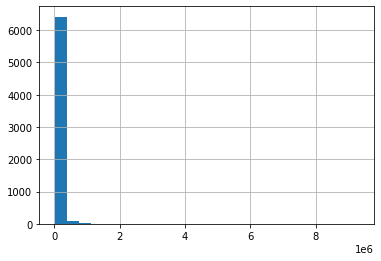

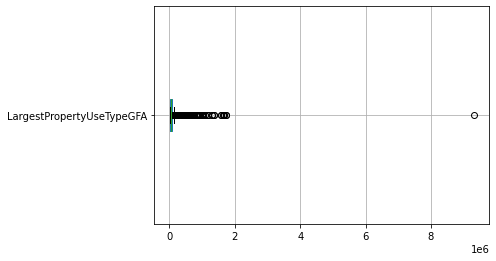

pour la catégorie : SecondLargestPropertyUseTypeGFA
--------------------
moy:
 28074.10015345275
med:
 10631.0
mod:
 0    0.0
dtype: float64
var:
 2858583941.7683
ect:
 53465.726795474315
skw:
 4.961205067572829
kur:
 35.00342977012479
--------------------


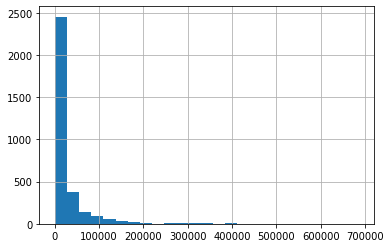

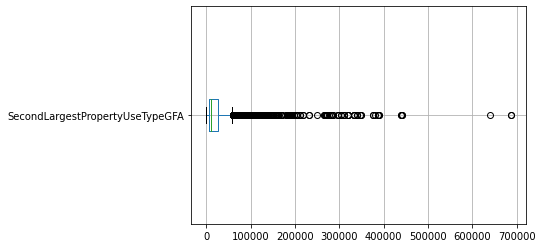

pour la catégorie : ThirdLargestPropertyUseTypeGFA
--------------------
moy:
 11262.497749726645
med:
 5039.0
mod:
 0    0.0
dtype: float64
var:
 690443028.8066871
ect:
 26276.282629144618
skw:
 8.820286143512078
kur:
 110.17002495833425
--------------------


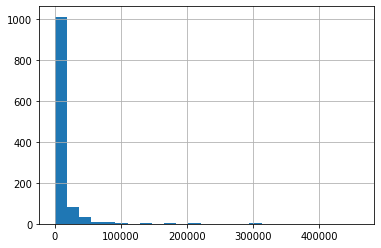

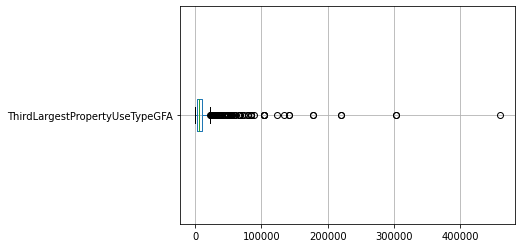

pour la catégorie : ENERGYSTARScore
--------------------
moy:
 67.9063420380915
med:
 75.0
mod:
 0    100.0
dtype: float64
var:
 729.511550196775
ect:
 27.0094714905119
skw:
 -0.8552997703685197
kur:
 -0.25088872406507656
--------------------


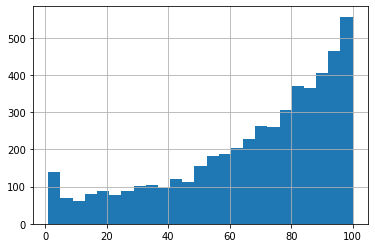

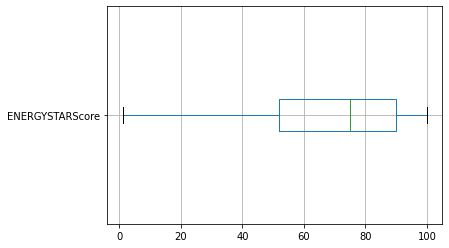

pour la catégorie : SiteEnergyUseWN(kBtu)
--------------------
moy:
 5240110.200673069
med:
 1926135.5
mod:
 0    0.0
dtype: float64
var:
 225235204533955.56
ect:
 15007838.103269756
skw:
 14.03378140347664
kur:
 291.1389631079832
--------------------


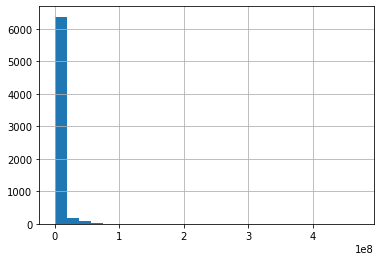

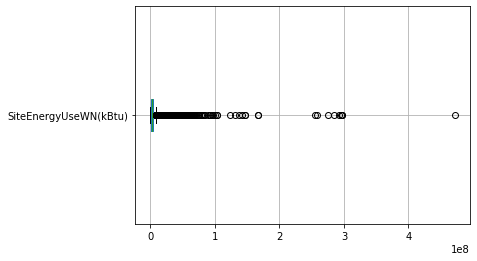

pour la catégorie : TotalGHGEmissions
--------------------
moy:
 114.95292264038224
med:
 33.2
mod:
 0    0.00
1    3.54
dtype: float64
var:
 229320.7710434149
ect:
 478.87448360025917
skw:
 19.273344597204076
kur:
 489.40399929193103
--------------------


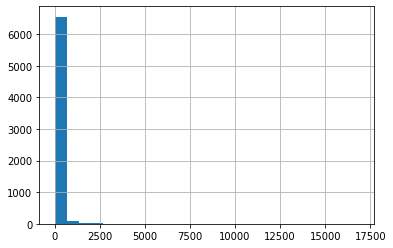

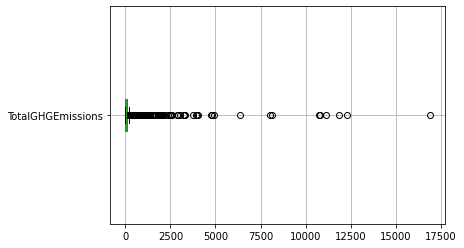

In [ ]:
analyse_uni(data_ind_final,data_ind_final.select_dtypes(include = ['int32','float64']).columns.tolist())

### Recherche d'Outliers


#### Imputation et KDTree

In [ ]:
def outlier_search(dataframe,liste_indicateur):

  from sklearn.preprocessing import StandardScaler
  from sklearn.impute import KNNImputer
  from sklearn.neighbors import KDTree
  import pickle


  frame=dataframe.copy()
  frame_to_clean=frame[liste_indicateur].copy()
  frame_to_keep=frame.drop(liste_indicateur,axis=1).copy()


  #normalisation des data
  scaler = StandardScaler()
  scal=scaler.fit_transform(frame_to_clean)
      #pickle.dump(scaler, open('scaler_appli.pickle', 'wb'))
  data_scal=pd.DataFrame(scal,columns=liste_indicateur)
  
  #imputation des NaN
  data_work_imp=data_scal.copy()
  imput=KNNImputer(n_neighbors=5)
  imp=imput.fit_transform(data_work_imp)
      #pickle.dump(imput, open('imput_nettoyage_app.pickle', 'wb'))
  data_imp=pd.DataFrame(imp,columns=liste_indicateur)

  #nettoyage des entrées par distance euclidienne
  tree = KDTree(data_imp)#calcul de la distance euclidienne entre les 5 plus proches voisins             
  dist, ind = tree.query(data_imp, k=5)
  data_dist=pd.DataFrame(dist)
  moy_dist = []
  for i in range ( len ( data_dist)):#Calcul la moyenne des distances euclidiennes pour chaque entrée
    moy_dist.append (data_dist.iloc[i].mean())
  
  #récupération des valeurs data
  data_to_invers=data_imp.copy()
  invers = scaler.inverse_transform(data_to_invers)
  data_invers=pd.DataFrame(invers,columns=liste_indicateur)
  data_invers['moy_distance']=moy_dist

  #fusion des data set 
  for col in frame_to_keep.columns:
    data_invers[col]=frame_to_keep[col].values

  #frame_merge=pd.concat([data_invers,frame_to_keep], axis=1, sort=False)
  
  # filtre sur le 99eme percentile de la distance euclidienne
  data_scale_dist_p=data_invers.copy()
  dist_per_99=np.percentile(data_scale_dist_p['moy_distance'],99)
  masque_dist_percentil = data_scale_dist_p ['moy_distance'] <= dist_per_99 
  data_work_dist_per99 = data_scale_dist_p[masque_dist_percentil]
  data_work_dist_per99=data_work_dist_per99.drop('moy_distance',axis=1)
  data_work_dist_per99=data_work_dist_per99.reset_index(drop=True)

  return data_work_dist_per99

In [ ]:
data_imp_outlier=outlier_search(data_ind_final,data_ind_final.select_dtypes(include = ['int32','float64']).columns.tolist())

In [ ]:
data_imp_outlier.head()

,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude
0,12.0,0.0,88434.0,88434.0,5238.0,7729.6,65.0,7097539.0,249.43,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,88434,Hotel,NaN,NaN,47.61219025,-122.33799744
1,11.0,15064.0,88502.0,83880.0,15064.0,4622.0,51.0,8765788.0,263.51,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,103566,Hotel,Parking,Restaurant,47.61310583,-122.33335756
2,10.0,0.0,61320.0,61320.0,59433.8,22284.6,1.0,28363444.0,1936.34,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,61320,Hotel,NaN,NaN,47.61421585,-122.33660889
3,18.0,12460.0,107430.0,123445.0,68009.0,0.0,67.0,15078243.0,507.70,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,119890,Hotel,Parking,Swimming Pool,47.6137544,-122.3409238
4,2.0,37198.0,60090.0,88830.0,6564.2,15090.8,21.6,13045258.0,304.62,9,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,97288,Police Station,NaN,NaN,47.6164389,-122.33676431


In [ ]:
data_imp_outlier=data_imp_outlier.fillna(0)

###Transformation au log des variables à modéliser 

In [ ]:
data_imp_outlier['SiteEnergyUseWN(kBtu)'].skew()

5.280165466493505

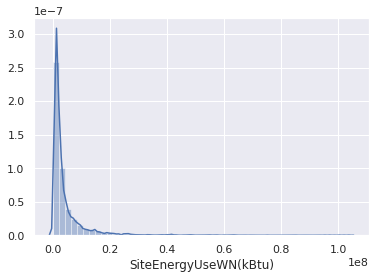

In [ ]:
sns.set(font_scale=1)
sns.distplot(data_imp_outlier['SiteEnergyUseWN(kBtu)'])

In [ ]:
data_log = np.log(data_imp_outlier['SiteEnergyUseWN(kBtu)'])
data_log_1p = np.log1p(data_imp_outlier['SiteEnergyUseWN(kBtu)'])
data_log_2 = np.log2(data_imp_outlier['SiteEnergyUseWN(kBtu)'])
data_log_10 = np.log10(data_imp_outlier['SiteEnergyUseWN(kBtu)'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


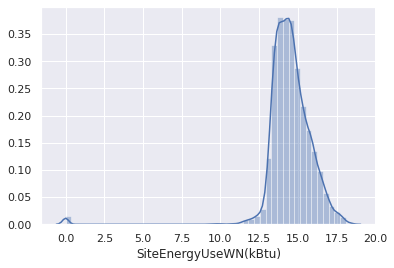

In [ ]:
sns.distplot(data_log_1p)

In [ ]:
data_imp_outlier['log_SiteEnergyUseWN(kBtu)']=data_log_1p

In [ ]:
data_imp_outlier=data_imp_outlier.drop('SiteEnergyUseWN(kBtu)',axis=1)

In [ ]:
data_imp_outlier['TotalGHGEmissions'].skew()

8.11529929340361

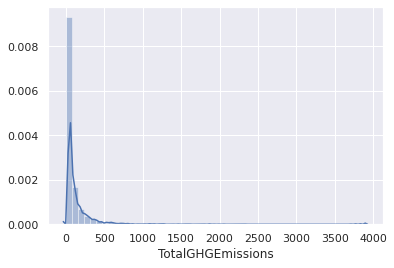

In [ ]:
sns.set(font_scale=1)
sns.distplot(data_imp_outlier['TotalGHGEmissions'])

In [ ]:
data_log_g = np.log(data_imp_outlier['TotalGHGEmissions'])
data_log_1p_g = np.log1p(data_imp_outlier['TotalGHGEmissions'])
data_log_2_g = np.log2(data_imp_outlier['TotalGHGEmissions'])
data_log_10_g = np.log10(data_imp_outlier['TotalGHGEmissions'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


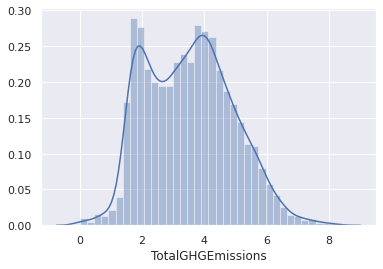

In [ ]:
sns.distplot(data_log_1p_g)

In [ ]:
data_imp_outlier['log_TotalGHGEmissions']=data_log_1p_g

In [ ]:
data_imp_outlier=data_imp_outlier.drop('TotalGHGEmissions',axis=1)

In [ ]:
data_imp_outlier.head()

,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,log_SiteEnergyUseWN(kBtu),log_TotalGHGEmissions
0,12.0,0.0,88434.0,88434.0,5238.0,7729.6,65.0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,88434,Hotel,0,0,47.61219025,-122.33799744,15.775259,5.523179
1,11.0,15064.0,88502.0,83880.0,15064.0,4622.0,51.0,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,103566,Hotel,Parking,Restaurant,47.61310583,-122.33335756,15.986367,5.577879
2,10.0,0.0,61320.0,61320.0,59433.8,22284.6,1.0,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,61320,Hotel,0,0,47.61421585,-122.33660889,17.160612,7.569071
3,18.0,12460.0,107430.0,123445.0,68009.0,0.0,67.0,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,119890,Hotel,Parking,Swimming Pool,47.6137544,-122.3409238,16.528763,6.231858
4,2.0,37198.0,60090.0,88830.0,6564.2,15090.8,21.6,9,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,97288,Police Station,0,0,47.6164389,-122.33676431,16.383935,5.722343


In [ ]:
data_imp_outlier.to_csv('P4_data_clean.csv')

#Modélisation

In [ ]:
### autre notebook